In [1]:
#hide

In [2]:
#hide
import utils
utils.hero("Emperical Time Complexity")

In the last lecture, we saw how to get an idea of **time complexity** by counting the total number of operations. However, in this lecuture, we will look into finding the exact time it took for a function to run using `time` module.

In [2]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
# We create a helper method for this
def test(Ns_range: range, num_trials: int, gen: Callable, alg: Callable) -> float:
    """
    Run an algorithm multiple times and gives the time it
    takes for the algo to run.

    Parameters
    ----------
    Ns_range: range
        A range of input size, I want to run on the algorithm.
    num_trials: int
        Number of times, the algo should be evaluated for a given input size
    gen: Callable
        Function to generate a random problem of a given input size for the algo to solve.
    alg: Callable
        Actual algorithm to be tested.

    Returns
    -------
    float:
        How long the algo took to run in seconds.
    """

    Ns = [] # Input sizes
    avg_times = []

    for N in Ns_range:
        # Generate the problem
        problem = gen(N)
        total_time = 0.
        # Solve the problem num_trials number of times
        for i in range(num_trials):
            tic = time.time()
            solution = alg(problem)
            toc = time.time()
            total_time += (toc - tic)
        Ns.append(N)
        avg_times.append(total_time / num_trials)

    plt.plot(Ns, avg_times)
    plt.xlabel("Input size")
    plt.ylabel("Runtime (sec)")

In [4]:
def has_duplicates(arr: np.array) -> bool:
    """
    Find if there is any duplicate entries in an
    arr.

    Parameters
    ----------
    arr: np.ndarray
        Array of numbers

    Returns
    -------
    bool
        True if the arr has duplicates, ow False
    """
    result = False # Assume no duplicates

    for i, x in enumerate(arr):
        for j, y in enumerate(arr):
            if i != j and x == y:
                result = True

    return result

def has_duplicates_version_1(arr: np.array) -> bool:
    """
    Find if there is any duplicate entries in an
    arr.

    Parameters
    ----------
    arr: np.ndarray
        Array of numbers

    Returns
    -------
    bool
        True if the arr has duplicates, ow False
    """
    result = False # Assume no duplicates

    for i, x in enumerate(arr):
        for j in range(i+1, len(arr)):
            y = arr[j]
            if x == y:
                result = True

    return result

def has_duplicates_version_2(arr: np.array) -> bool:
    """
    Find if there is any duplicate entries in an
    arr.

    Parameters
    ----------
    arr: np.ndarray
        Array of numbers

    Returns
    -------
    bool
        True if the arr has duplicates, ow False
    """
    result = False # Assume no duplicates

    for i, x in enumerate(arr):
        for j in range(i+1, len(arr)):
            y = arr[j]
            if x == y:
                result = True
                return result

    return result

def has_duplicates_version_3(arr: np.array) -> bool:
    """
    Find if there is any duplicate entries in an
    arr.

    Parameters
    ----------
    arr: np.ndarray
        Array of numbers

    Returns
    -------
    bool
        True if the arr has duplicates, ow False
    """
    result = False # Assume no duplicates
    arr = sorted(arr)
    i = 0
    
    while i < len(arr) - 1 and result != True:
        if arr[i] == arr[i+1]:
            result = True
        i += 1

    return result

In [5]:
def gen_rand_arr(N):
    return np.random.randint(0, N*3, N)

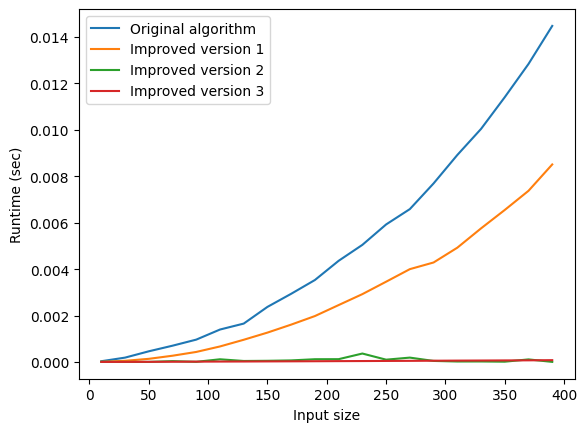

In [8]:
np.random.seed(0)
test(Ns_range=range(10, 410, 20), num_trials=10, gen=gen_rand_arr, alg=has_duplicates)
test(Ns_range=range(10, 410, 20), num_trials=10, gen=gen_rand_arr, alg=has_duplicates_version_1)
test(Ns_range=range(10, 410, 20), num_trials=10, gen=gen_rand_arr, alg=has_duplicates_version_2)
test(Ns_range=range(10, 410, 20), num_trials=10, gen=gen_rand_arr, alg=has_duplicates_version_3)

plt.legend(["Original algorithm", "Improved version 1", "Improved version 2", "Improved version 3"])

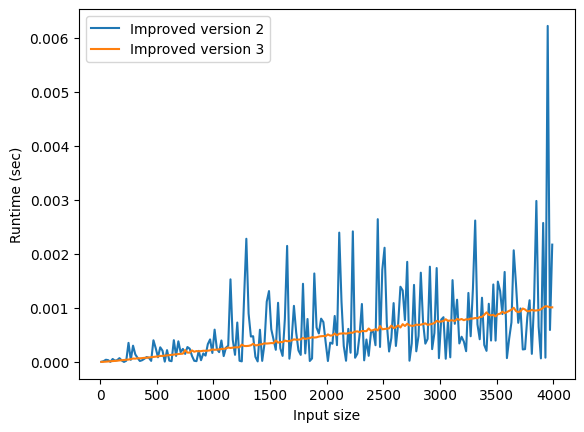

In [11]:
test(Ns_range=range(10, 4010, 20), num_trials=10, gen=gen_rand_arr, alg=has_duplicates_version_2)
test(Ns_range=range(10, 4010, 20), num_trials=10, gen=gen_rand_arr, alg=has_duplicates_version_3)
plt.legend(["Improved version 2", "Improved version 3"])